## 🧹 Step 3: Data Cleaning & Feature Engineering
We will create a `Total_PowerConsumption` column, extract time-based features, and save the cleaned dataset.

In [2]:
# 1. Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="whitegrid")

## 📥 Load the original dataset

In [3]:
df = pd.read_csv('../Datasets/powerconsumption.csv')
df['Datetime'] = pd.to_datetime(df['Datetime'])
df.set_index('Datetime', inplace=True)

## ➕ Create Total Power Consumption column

In [4]:
df['Total_PowerConsumption'] = (
    df['PowerConsumption_Zone1'] +
    df['PowerConsumption_Zone2'] +
    df['PowerConsumption_Zone3']
)

## 🔍 Check for missing values

In [5]:
print("Missing values:")
print(df.isnull().sum())

Missing values:
Temperature               0
Humidity                  0
WindSpeed                 0
GeneralDiffuseFlows       0
DiffuseFlows              0
PowerConsumption_Zone1    0
PowerConsumption_Zone2    0
PowerConsumption_Zone3    0
Total_PowerConsumption    0
dtype: int64


## 🧼 Drop rows with missing values

In [6]:
df.dropna(inplace=True)

## 🕒 Extract time-based features

In [7]:
df['hour'] = df.index.hour
df['dayofweek'] = df.index.dayofweek
df['is_weekend'] = df['dayofweek'].apply(lambda x: 1 if x >= 5 else 0)

## ⏳ Optional: Resample to hourly average (skip if not needed)

In [8]:
# df = df.resample('H').mean()

## 💾 Save cleaned dataset

In [9]:
df.to_csv('../Datasets/cleaned_powerconsumption.csv')

## 📊 Plot total power consumption

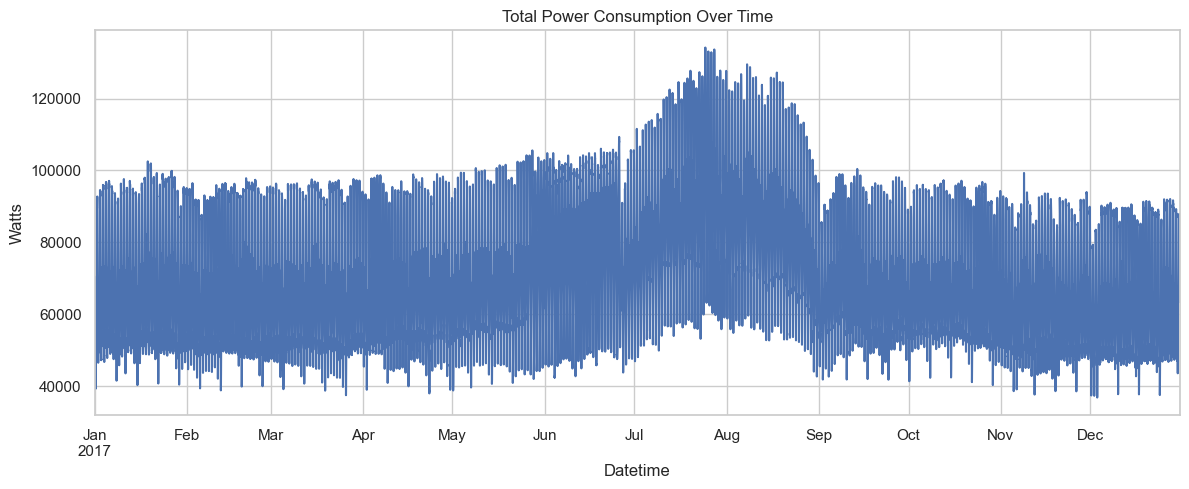

In [10]:
plt.figure(figsize=(14, 5))
df['Total_PowerConsumption'].plot()
plt.title('Total Power Consumption Over Time')
plt.ylabel('Watts')
plt.show()

## 👀 Preview cleaned dataset

In [11]:
df.head()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,Total_PowerConsumption,hour,dayofweek,is_weekend
Datetime,,,,,,,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,70425.53544,0,6,1
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,69320.84387,0,6,1
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,67803.22193,0,6,1
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,65489.23209,0,6,1
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,63650.44627,0,6,1
